## Introduction:
We have developed a Convolutional Neural network which accurately predicts the different handwritings. We have used the standard MNIST data set in developing this.

## Advantage:
* Python language is easy to understand and demonstrate the neural networks precisely.
* This CNN gives an accuracy of 98.5%.
* We also find that the working of keras and TensorFlow APIs using predefined functions make a complex algorithm easy to implement with proper knowledge and implementation.
* This project demonstrates minimum computational cost.
* The time complexity is also very less.

## Disadvantage:
* Limitations to decrease the inaccuracy during developing this project is observed.
* We will always have to pre-process the data in a specific format(28,28,1) without which the neural network won't function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
import os

In [2]:
#Preparing Data
train_data = pd.read_csv("emnist1/emnist-balanced-train.csv",delimiter = ',')
test_data = pd.read_csv("emnist1/emnist-balanced-test.csv", delimiter = ',')
mapp = pd.read_csv("emnist1/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)


X_train = train_data.iloc[:,1:].values
y_train = train_data.iloc[:,0].values
X_test = test_data.iloc[:,1:].values
y_test = test_data.iloc[:,0].values
H = 28
W = 28

In [3]:
# The images are originally rotated to 90 degrees so this converts them to proper orientation
def rotate(image):
    image = image.reshape([H,W])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

X_train = np.apply_along_axis(rotate,1,X_train)
X_test = np.apply_along_axis(rotate,1,X_test)

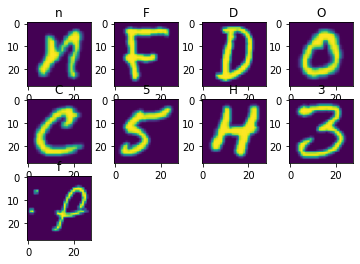

In [4]:
# Plot example images
for i in range(10,19) :
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i])
    plt.title(chr(mapp[y_train[i]]))

num_classes = len(np.unique(y_train))


In [5]:
# Reshaping for input to CNN
X_train = X_train.reshape([-1,H,W,1])
X_test = X_test.reshape([-1,H,W,1])

#Rescaling
X_train = X_train.astype('float32')
X_train /=255.0
X_test = X_test.astype('float32')
X_test /=255.0

In [6]:
# One hot Encoding
#y_train = tf.keras.utils.to_categorical(y_train,num_classes)
#y_test = tf.keras.utils.to_categorical(y_test,num_classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1)


print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
X_train:  (101519, 28, 28, 1)

X_train:  (101519, 28, 28, 1)
y_train:  (101519,)
X_valid:  (11280, 28, 28, 1)
y_valid:  (11280,)
X_test:  (18799, 28, 28, 1)
y_test:  (18799,)


In [7]:
def model_arch(input_shape) :
    input_x = tf.keras.layers.Input(input_shape)
    X = tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu')(input_x)
    X = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(X)
    X = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(X)
    X = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(X)
    X = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(X)
    X = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(256,activation='relu')(X)
    X = tf.keras.layers.Dense(128,activation='relu')(X)
    X = tf.keras.layers.Dense(num_classes,activation='softmax')(X)
    model = tf.keras.Model(inputs=input_x, outputs=X)
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

In [8]:
model = model_arch((H,W,1))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0     

In [9]:
# Training the model
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 4,
                          verbose = 1,
                          mode = 'auto'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.9, patience = 3)
]
history = model.fit( X_train,y_train,
           batch_size=64,
           epochs=2, 
           callbacks=callbacks,
           validation_data=(X_valid,y_valid))

Train on 101519 samples, validate on 11280 samples
Epoch 1/2
101519/101519 [==============================] - 102s 1ms/sample - loss: 0.6807 - accuracy: 0.7810 - val_loss: 0.4192 - val_accuracy: 0.8496
Epoch 2/2
101519/101519 [==============================] - 104s 1ms/sample - loss: 0.3807 - accuracy: 0.8643 - val_loss: 0.3671 - val_accuracy: 0.8716


In [10]:
model.save("handwriting_recognition_model.h5")

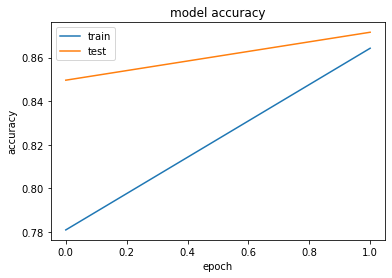

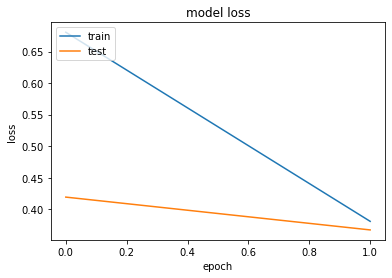

In [11]:
# Plot accuracy, validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot loss, validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
val_loss,val_acc = model.evaluate(X_test, y_test)
print(val_loss,val_acc)

18799/18799 [==============================] - 5s 244us/sample - loss: 0.3865 - accuracy: 0.8652
0.3865282141015824 0.8651524


In [13]:
path = os.chdir(r"C:\Users\SAHIL")

In [14]:
image = cv2.imread("B.png",cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,(28,28))
image = cv2.bitwise_not(image)
image = image.astype("float32")
image1 = image.reshape(1,28,28,1)
image/=255

In [15]:
model.predict(image1)

array([[4.9313437e-04, 7.9282208e-06, 7.2719948e-04, 1.8208120e-05,
        3.0509969e-05, 3.9173930e-05, 2.1761758e-05, 1.1633637e-06,
        2.4274797e-05, 7.5576831e-06, 1.3271759e-04, 4.0656261e-04,
        1.1908312e-01, 7.6995860e-07, 5.6168037e-03, 2.8746037e-04,
        5.8285409e-04, 2.2394246e-04, 2.7542611e-04, 2.3870480e-05,
        1.3793399e-05, 6.8424683e-04, 3.4725365e-06, 2.5153160e-04,
        1.9374656e-04, 4.3867534e-05, 7.7774494e-06, 1.0459700e-03,
        1.6148357e-05, 5.7081097e-06, 2.2443366e-05, 7.8954179e-07,
        1.1235164e-06, 9.9223153e-06, 1.9240624e-06, 8.7607023e-04,
        3.4796407e-03, 1.0118470e-05, 1.2409811e-02, 8.4957653e-01,
        3.2656153e-05, 1.9077546e-03, 2.7616264e-07, 8.7824719e-06,
        1.5322112e-04, 1.1952258e-04, 1.1187294e-03]], dtype=float32)

In [20]:
model.predict(image1).argmax()

39

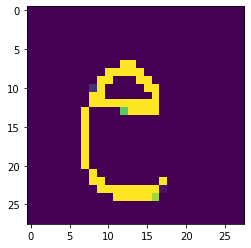

In [16]:
plt.imshow(image)

In [6]:
from tkinter import *
import tensorflow as tf
import cv2
import numpy
import math
from PIL import ImageTk, Image
# import filedialog module 
from tkinter import filedialog 

# Function for opening the ?
# file explorer window 
def browseFiles(): 
    filename = filedialog.askopenfilename(initialdir = "/", title = "Select a File", filetypes = (('all files', '.*'),
               ('text files', '.txt'),
               ('image files', ('.png', '.jpg')),
           ))
    
    image = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image,(28,28))
    image = cv2.bitwise_not(image)
    image = image.astype("float32")
    image1 = image.reshape(1,28,28,1)
    image/=255
    
    reconstructed_model = tf.keras.models.load_model("handwriting_recognition_model.h5")
    
    ans = reconstructed_model.predict(image1).argmax()

    if ans>0 and ans<=9:
        ascii = ans
        print(ascii)

    elif ans>=10 and ans<36:

        ascii = chr(ans+55)
        print(ascii)

    elif ans>=36 and ans<48:

        ascii = chr(ans+62)
        print(ascii)

    else:
        ascii = "error"
        print(ascii)
    
    # Show Recognized Character 
    notif1.configure(text="The recognized character is: "+str(ascii)) 
    
#Exit App
def exit_app():
    window.destroy()

# Create the root window 
window = Tk() 

# Set window title 
window.title('File Explorer') 

# Set window size 
window.geometry("500x600") 
logo = ImageTk.PhotoImage(Image.open("Background.png"))
label1 = Label(window, image=logo, justify=CENTER)
 

# Create a File Explorer label  
label_file_explorer = Label(window, text = "Handwriting Recognition System", font=("Trebuchet MS",14,"bold", "underline"), fg = "blue") 


button_explore = Button(window, text = "Browse Files", command = browseFiles) 

button_exit = Button(window, text = "Exit", command = exit_app) 

notif1 = Label(window, text="",font=("Arial sans MS",14,"bold"))

# Grid method is chosen for placing 
# the widgets at respective positions 
# in a table like structure by 
# specifying rows and columns
label1.pack()
label_file_explorer.pack()

button_explore.pack(pady=(40,0))

button_exit.pack(pady=(10,0))

notif1.pack(pady=(40,0))

# Let the window wait for any events 
window.mainloop() 
